In [226]:
# step 1: Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Understanding the mean, standard deviation, and Z-scores

In [227]:
# Step 2: Create the data
data = pd.DataFrame({"Age": [18, 19, 20]})
data

,Age
0,18
1,19
2,20


In [228]:
mean = np.mean(data["Age"]) # it will calculate the mean
std = np.std(data["Age"]) # it will calculate the standard deviation 
# formula of standard deviation is sqrt(variance)
# variance is the average of the squared difference between each data point and the mean.
# formula of the variance : sum((x - mean) ** 2) / n where 'x' is each data point, 'mean' is the mean of the data, and 'n' is the number of data points.

print(mean)
print(std)

19.0
0.816496580927726


<Axes: xlabel='Age', ylabel='Count'>

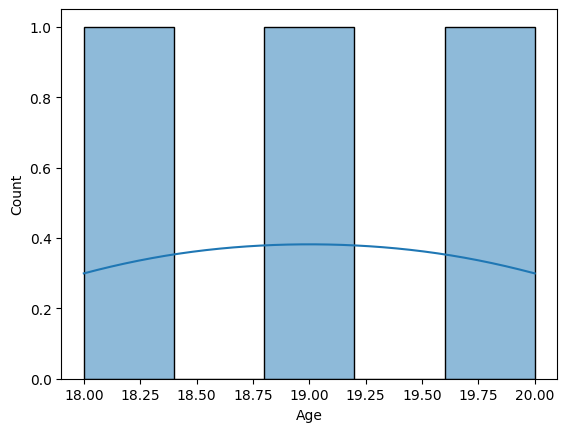

In [229]:
sns.histplot(data["Age"], bins = 5, kde = True)
# what does the above line do? it will plot the histogram of the data, 
# bins = 5 is the number of bins, kde = True is the kernel density estimate

<Axes: ylabel='Age'>

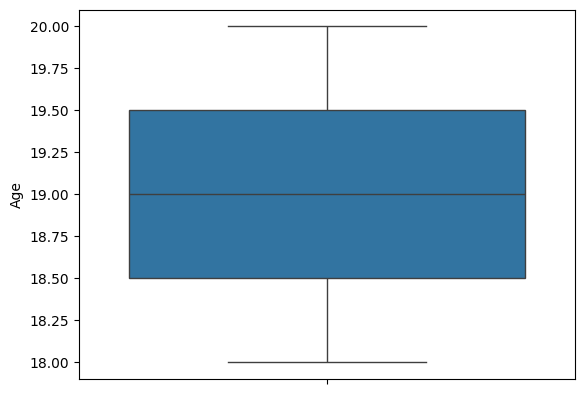

In [230]:
sns.boxplot(data["Age"])
# This code line will boxplot the data

## 2. Understanding the Outliers
`Outliers` are data points that are `outside` the range of the majority of the data points. In other words, they are data points that are `far from the rest of the data points`. Outliers can be caused by errors in the data collection process, or by natural variations in the data. 

In [231]:
# Here we add more data to the same dataframe
data = pd.DataFrame({"Age": [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})
print(data)
print("-------------------------")

    Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
-------------------------


In [232]:
#Calcualte the mean and standard deviation again 
mean = np.mean(data["Age"]) 
std = np.std(data["Age"]) 

$$mean (\mu) = \frac{\sum_{i=1}^{n} x_i}{n}$$
where $x_i$ is each data point, $n$ is the number of data points

$$standard\ deviation (\sigma) = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}}$$
where $x_i$ is each data point, $n$ is the number of data points, and $\mu$ is the mean of the data
$$z-scores = \frac{x - \mu}{\sigma}$$
where $x$ is each data point, $\mu$ is the mean of the data, and $\sigma$ is the standard deviation of the data

In [233]:
print(f"The mean is {mean} and the standard deviation is {std}") # it will print the mean and standard deviation


# Step 4: Calculate the upper and lower bounds
lower_bound = mean - 3 * std    # it will calculate the lower bound
upper_bound = mean + 3 * std    # it will calculate the upper bound
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

The mean is 27.083333333333332 and the standard deviation is 7.543853274171114
Lower bound: 4.45177351081999
Upper bound: 49.714893155846674


In [234]:
# Step 5: Calculate the Z-scores
data['mean'] = np.mean(data['Age'])
data['std'] = np.std(data['Age'])   
data['z_scores'] = (data['Age'] - mean) / std
data


,Age,mean,std,z_scores
0,20,27.083333,7.543853,-0.938954
1,21,27.083333,7.543853,-0.806396
2,22,27.083333,7.543853,-0.673838
3,23,27.083333,7.543853,-0.541280
4,24,27.083333,7.543853,-0.408721
5,25,27.083333,7.543853,-0.276163
6,26,27.083333,7.543853,-0.143605
7,27,27.083333,7.543853,-0.011047
8,28,27.083333,7.543853,0.121512
9,29,27.083333,7.543853,0.254070


In [235]:
# Step 5: Print the data
print("--------------------------------------")
print(f"Here is the data including outliner:\n {data}")
print("--------------------------------------")

--------------------------------------
Here is the data including outliner:
     Age       mean       std  z_scores
0    20  27.083333  7.543853 -0.938954
1    21  27.083333  7.543853 -0.806396
2    22  27.083333  7.543853 -0.673838
3    23  27.083333  7.543853 -0.541280
4    24  27.083333  7.543853 -0.408721
5    25  27.083333  7.543853 -0.276163
6    26  27.083333  7.543853 -0.143605
7    27  27.083333  7.543853 -0.011047
8    28  27.083333  7.543853  0.121512
9    29  27.083333  7.543853  0.254070
10   30  27.083333  7.543853  0.386628
11   50  27.083333  7.543853  3.037793
--------------------------------------


In [236]:
# Step 6: Print the outliers
print(f"Here are the outliers based on the upper z-score criteria:\n {data[data['z_scores'] > 3]}")
print("--------------------------------------")

print(f"Here are the outliers based on the lower z-score criteria:\n {data[data['z_scores'] < -3]}")
#Because we do not have values of '-3', we will have no outliers in that region of '-3'
print("--------------------------------------")


Here are the outliers based on the upper z-score criteria:
     Age       mean       std  z_scores
11   50  27.083333  7.543853  3.037793
--------------------------------------
Here are the outliers based on the lower z-score criteria:
 Empty DataFrame
Columns: [Age, mean, std, z_scores]
Index: []
--------------------------------------


#### 2.1 Removing the Outliers

In [237]:
# STEP 7: Remove the outliers
data = data[data["z_scores"] <= 3]
# in the above step, we have removed the outliers from the data whose z_scores are less than or equal to 3
# if we want to remove the outliers from the data whose z_scores are greater than 3, we can use the following code:
# data = data[data["z_scores"] >= 3]

# STEP 8: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

Here is the data without outliers:
     Age       mean       std  z_scores
0    20  27.083333  7.543853 -0.938954
1    21  27.083333  7.543853 -0.806396
2    22  27.083333  7.543853 -0.673838
3    23  27.083333  7.543853 -0.541280
4    24  27.083333  7.543853 -0.408721
5    25  27.083333  7.543853 -0.276163
6    26  27.083333  7.543853 -0.143605
7    27  27.083333  7.543853 -0.011047
8    28  27.083333  7.543853  0.121512
9    29  27.083333  7.543853  0.254070
10   30  27.083333  7.543853  0.386628


## 3. Removing the Outliers with Z-score and stats module
We can also remove the outliers using the Z-score and stats module of `scipy` as follows.

In [238]:
# import libraries
import numpy as np
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)


----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


## 4. Removing the Outliers with IQR

`IQR (Interquartile Range)` is a statistical measure that is used to identify outliers in a dataset. It is calculated as the difference between the `third quartile (Q3)` and the `first quartile (Q1)`.

Generally, Q3 is the 75th percentile and Q1 is the 25th percentile. It is shown in the above boxplot graph.

In [239]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   50
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


## 5. Removing the Outliers with K-mean clustering

`K-means` clustering is a popular `unsupervised learning` algorithm that groups data points into clusters based on their similarity. It is a useful tool for identifying outliers in a dataset.

In [240]:
# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
data


[[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

In [241]:

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10) 
# n_init is the number of times the algorithm is run to find the best fit
# n_clusters is the number of clusters

# TRAIN THE MODEL
kmeans.fit(data)

# PREDICT THE CLUSTERS
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 0]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 1]
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[30, 30], [31, 31], [32, 32]]
Data without outliers: [[2, 2], [3, 3], [3, 4]]
